In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 粗看数据

In [2]:
data = pd.read_csv('../data/train/train.csv')

In [3]:
data.head(8)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1


In [ ]:
data['test_id'].value

要我们预测is_pass，是个二元分类问题

In [4]:
data.describe()
# 这里只能看到一些数值型特征的统计

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


忽略掉test_id和trainee_id两行的统计。通过is_pass，50%是1.0，说明有半数通过了考核

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49323 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49259 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49298 non-null  float64
 11  age                        30619 non-null  float64
 12  total_programs_enrolled    49306 non-null  float64
 13  is_handicapped             49280 non-null  obj

每个特征都有一定的缺失，但除了age特征，其他特征缺失都并不多。如果是**数值型特征**，可以考虑**用平均值填充**。如果是字符串型特征，可以考虑删除该项id

# 缺失值可视化

In [6]:
data.isnull().sum()
# 先总体看一下缺失值情况

id_num                           0
program_type                   731
program_id                     699
program_duration               675
test_id                        725
test_type                      702
difficulty_level               703
trainee_id                     739
gender                         707
education                      702
city_tier                      700
age                          19379
total_programs_enrolled        692
is_handicapped                 718
trainee_engagement_rating      772
is_pass                          0
dtype: int64

<AxesSubplot:>

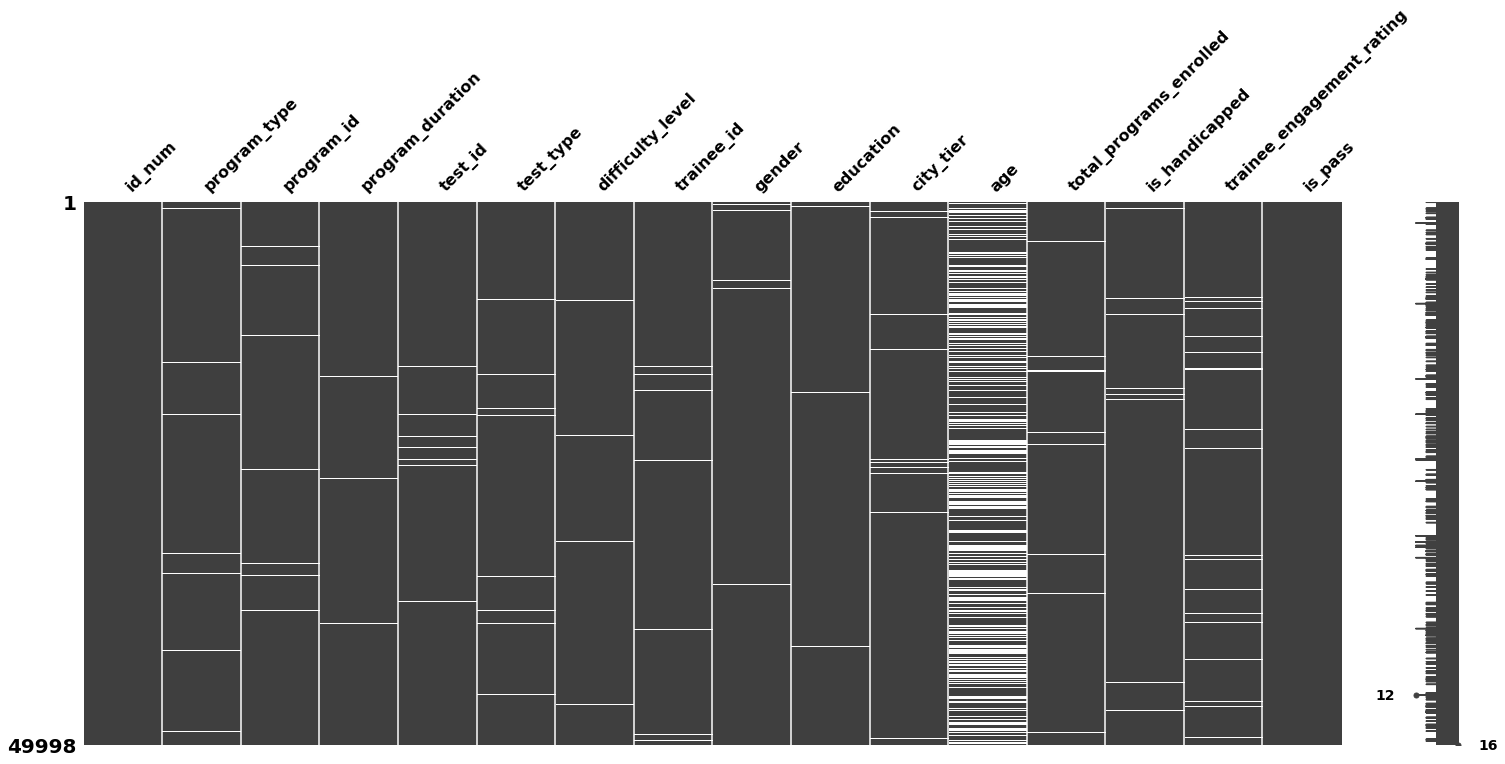

In [7]:
msno.matrix(data)

**白线越多，缺失值越多**，其余都是个别有缺失值，age则是大部分

<AxesSubplot:>

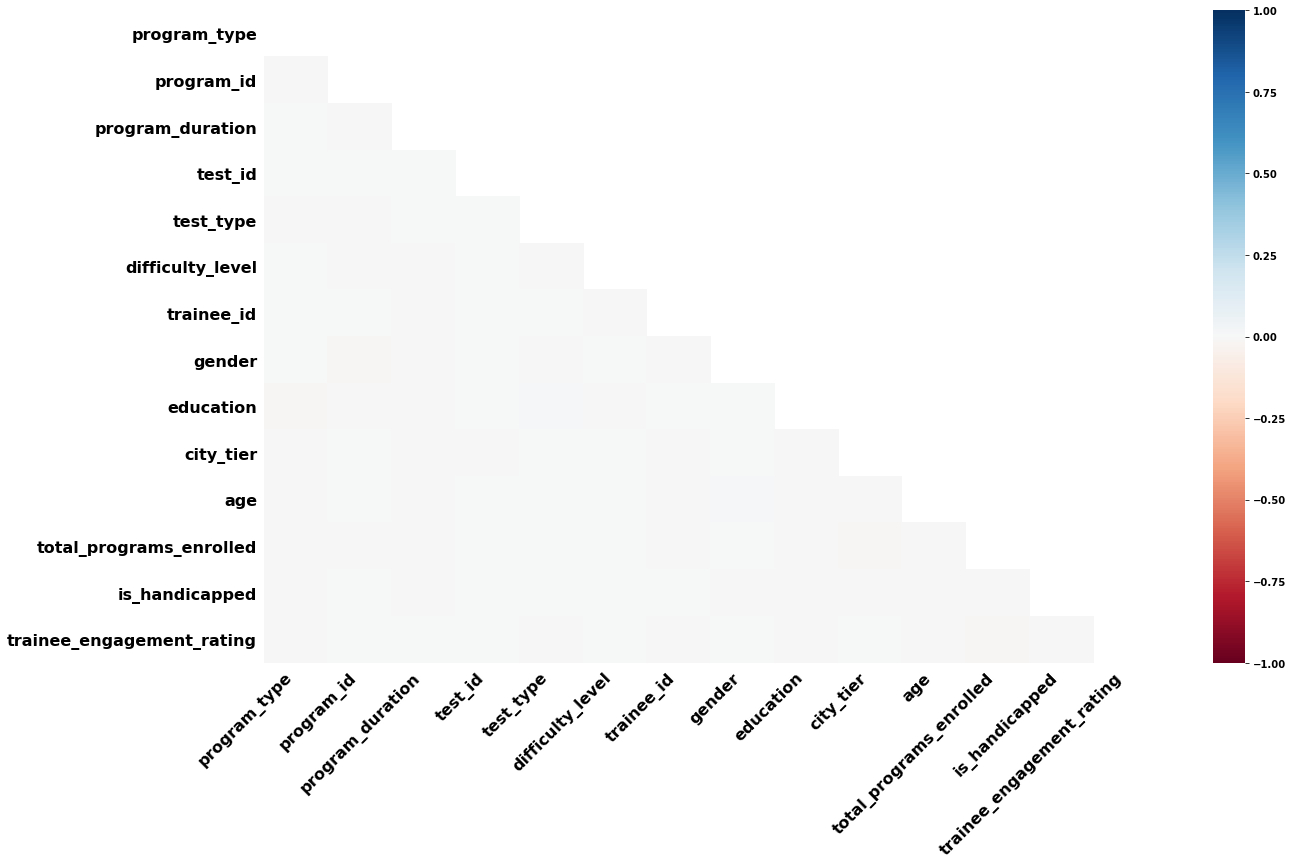

In [8]:
msno.heatmap(data)

运用热力图发现 缺失值间出现没有相关性

# 缺失值处理

In [9]:
# 年龄,计划持续天数用平均值进行填充
data['age'] = data['age'].fillna(data['age'].mean())
data['program_duration'] = data['program_duration'].fillna(data['program_duration'].mean())

In [10]:
data.isnull().sum()
# age和program_duration处为0，说明填充好了

id_num                         0
program_type                 731
program_id                   699
program_duration               0
test_id                      725
test_type                    702
difficulty_level             703
trainee_id                   739
gender                       707
education                    702
city_tier                    700
age                            0
total_programs_enrolled      692
is_handicapped               718
trainee_engagement_rating    772
is_pass                        0
dtype: int64

In [11]:
# 其他特征如果有缺失则删除，因为其他特征是用于分类，分错类会产生误导
data = data.dropna()

In [12]:
data
# 可见少了7k多条数据

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.000000,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.000000,5.0,N,1.0,0
1,16523_44,T,T_1,131.000000,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.000000,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.000000,178.0,online,easy,13987.0,M,Matriculation,1.0,40.000000,1.0,N,2.0,1
3,13158_32,T,T_2,117.000000,32.0,offline,easy,13158.0,F,Matriculation,3.0,36.514256,4.0,N,1.0,1
4,10591_84,V,V_3,131.000000,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.000000,2.0,N,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,12375_173,Z,Z_2,120.000000,173.0,online,easy,12375.0,F,Matriculation,4.0,26.000000,1.0,N,1.0,1
49993,4379_115,Y,Y_4,121.000000,115.0,offline,hard,4379.0,F,High School Diploma,2.0,36.514256,5.0,N,4.0,1
49994,3809_58,U,U_1,128.229366,58.0,offline,intermediate,3809.0,F,High School Diploma,3.0,30.000000,2.0,N,3.0,1
49995,18109_42,T,T_2,117.000000,42.0,online,easy,18109.0,F,High School Diploma,2.0,41.000000,2.0,N,1.0,1


# 特征离散化

In [13]:
data['test_type'].unique()

array(['offline', 'online'], dtype=object)

In [14]:
data.loc[data['test_type'] == 'offline', 'test_type'] = 0 # 令test_type等于offline那行的test_type值为0
data.loc[data['test_type'] == 'online', 'test_type'] = 1 # 另test_type等于online那行的test_type值为1，下同理

In [15]:
data['test_type'].value_counts()

0    25095
1    16949
Name: test_type, dtype: int64

In [16]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [17]:
data.loc[data['gender'] == 'M', 'gender'] = 0
data.loc[data['gender'] == 'F', 'gender'] = 1
data['gender'].value_counts()

0    22435
1    19609
Name: gender, dtype: int64

In [18]:
data['education'].unique()
# matriculation 是预科，比高中文凭高

array(['Matriculation', 'High School Diploma', 'Bachelors', 'Masters',
       'No Qualification'], dtype=object)

In [19]:
data.loc[data['education'] == 'No Qualification', 'education'] = 0
data.loc[data['education'] == 'High School Diploma', 'education'] = 1
data.loc[data['education'] == 'Matriculation', 'education'] = 2
data.loc[data['education'] == 'Bachelors', 'education'] = 3
data.loc[data['education'] == 'Masters', 'education'] = 4
data['education'].value_counts()

1    19752
2    15086
3     6617
4      307
0      282
Name: education, dtype: int64

In [20]:
data['difficulty_level'].unique()

array(['intermediate', 'easy', 'hard', 'vary hard'], dtype=object)

In [21]:
data.loc[data['difficulty_level'] == 'easy', 'difficulty_level'] = 0
data.loc[data['difficulty_level'] == 'intermediate', 'difficulty_level'] = 1
data.loc[data['difficulty_level'] == 'hard', 'difficulty_level'] = 2
data.loc[data['difficulty_level'] == 'vary hard', 'difficulty_level'] = 3
data['difficulty_level'].value_counts()

0    22965
1    11942
2     5959
3     1178
Name: difficulty_level, dtype: int64

In [22]:
data['is_handicapped'].unique()

array(['N', 'Y'], dtype=object)

In [23]:
data.loc[data['is_handicapped'] == 'Y', 'is_handicapped'] = 1
data.loc[data['is_handicapped'] == 'N', 'is_handicapped'] = 0
data['is_handicapped'].value_counts()

0    38222
1     3822
Name: is_handicapped, dtype: int64

In [24]:
data.head(10)
# 此时program_type， program_id还没有离散化。test_id和trainee_id感觉也不是很重要

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,0,1,9389.0,0,2,3.0,24.000000,5.0,0,1.0,0
1,16523_44,T,T_1,131.0,44.0,0,0,16523.0,1,1,4.0,26.000000,2.0,0,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,1,0,13987.0,0,2,1.0,40.000000,1.0,0,2.0,1
3,13158_32,T,T_2,117.0,32.0,0,0,13158.0,1,2,3.0,36.514256,4.0,0,1.0,1
4,10591_84,V,V_3,131.0,84.0,0,1,10591.0,1,1,1.0,42.000000,2.0,0,4.0,1
5,12531_23,T,T_3,134.0,23.0,0,1,12531.0,1,1,1.0,29.000000,4.0,0,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,1,0,17874.0,0,3,2.0,48.000000,3.0,0,3.0,1
8,5652_57,U,U_1,134.0,57.0,0,0,5652.0,0,2,4.0,36.514256,3.0,0,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,0,2,17019.0,0,3,3.0,28.000000,2.0,0,4.0,1
10,9932_80,V,V_3,131.0,80.0,0,0,9932.0,1,1,3.0,36.514256,2.0,0,4.0,1


# 关于id数据项的处理

In [25]:
data['trainee_id'].value_counts()
# 可见trainee_id值数量多，分布也不集中，考虑删去

5175.0     12
16122.0    11
6324.0     11
13983.0    11
16953.0    11
           ..
17388.0     1
6442.0      1
7388.0      1
4325.0      1
1.0         1
Name: trainee_id, Length: 16309, dtype: int64

In [26]:
data['test_id'].value_counts()
# 并不觉得它有用。仅是作为一个登陆的凭证罢了。也考虑删去

149.0    473
61.0     450
125.0    430
43.0     427
21.0     424
        ... 
8.0       73
1.0       71
9.0       70
4.0       70
3.0       66
Name: test_id, Length: 188, dtype: int64

In [27]:
data['program_type'].value_counts()
# 共7种，选择的程序类型不同，可能会影响效果，暂时不考虑删去

Y    12975
T    10534
V     7502
U     4504
Z     3870
X     1913
S      746
Name: program_type, dtype: int64

In [28]:
data['program_id'].value_counts()
# 共22种

Y_1    3874
Y_3    3814
T_3    3516
Y_4    2875
T_4    2753
U_1    2725
V_4    2484
T_2    2433
Y_2    2412
V_1    1981
V_3    1912
T_1    1832
U_2    1779
Z_3    1548
Z_2    1199
V_2    1125
Z_1    1123
X_1     788
X_3     678
X_2     447
S_2     379
S_1     367
Name: program_id, dtype: int64

trainee_id和test_id为**无序的离散值**,我考虑直接删除掉。而programme_type和programme_id有一定的顺序规律，对is_pass有影响，又因为programe_id值也表明了programe_type的身份（例Y_1表明了他programe_type为Y），所以可以删去programe_type，**只用独热编码来表达programe_id**。

id_num对训练也没有作用，删除。

In [29]:
after = data.copy().drop(['trainee_id', 'test_id', 'program_type','id_num'], axis=1)
after

,program_id,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y_1,136.000000,0,1,0,2,3.0,24.000000,5.0,0,1.0,0
1,T_1,131.000000,0,0,1,1,4.0,26.000000,2.0,0,3.0,1
2,Z_2,120.000000,1,0,0,2,1.0,40.000000,1.0,0,2.0,1
3,T_2,117.000000,0,0,1,2,3.0,36.514256,4.0,0,1.0,1
4,V_3,131.000000,0,1,1,1,1.0,42.000000,2.0,0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49992,Z_2,120.000000,1,0,1,2,4.0,26.000000,1.0,0,1.0,1
49993,Y_4,121.000000,0,2,1,1,2.0,36.514256,5.0,0,4.0,1
49994,U_1,128.229366,0,1,1,1,3.0,30.000000,2.0,0,3.0,1
49995,T_2,117.000000,1,0,1,1,2.0,41.000000,2.0,0,1.0,1


In [30]:
s = after['program_id']
s

0        Y_1
1        T_1
2        Z_2
3        T_2
4        V_3
        ... 
49992    Z_2
49993    Y_4
49994    U_1
49995    T_2
49996    Y_4
Name: program_id, Length: 42044, dtype: object

In [31]:
# 独热编码
onehot = pd.get_dummies(s)
onehot

,S_1,S_2,T_1,T_2,T_3,T_4,U_1,U_2,V_1,V_2,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49994,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


首先要删除原来program_id那一列。

然后将onehot拼接到原来那个特征矩阵上

In [32]:
after = after.drop('program_id', axis=1)
after

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,136.000000,0,1,0,2,3.0,24.000000,5.0,0,1.0,0
1,131.000000,0,0,1,1,4.0,26.000000,2.0,0,3.0,1
2,120.000000,1,0,0,2,1.0,40.000000,1.0,0,2.0,1
3,117.000000,0,0,1,2,3.0,36.514256,4.0,0,1.0,1
4,131.000000,0,1,1,1,1.0,42.000000,2.0,0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...
49992,120.000000,1,0,1,2,4.0,26.000000,1.0,0,1.0,1
49993,121.000000,0,2,1,1,2.0,36.514256,5.0,0,4.0,1
49994,128.229366,0,1,1,1,3.0,30.000000,2.0,0,3.0,1
49995,117.000000,1,0,1,1,2.0,41.000000,2.0,0,1.0,1


In [33]:
# 这里onehoted变量的命名是独热过，拼接后的df
onehoted = pd.concat([after, onehot], axis=1)
onehoted

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
0,136.000000,0,1,0,2,3.0,24.000000,5.0,0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,131.000000,0,0,1,1,4.0,26.000000,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,120.000000,1,0,0,2,1.0,40.000000,1.0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,117.000000,0,0,1,2,3.0,36.514256,4.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,131.000000,0,1,1,1,1.0,42.000000,2.0,0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,120.000000,1,0,1,2,4.0,26.000000,1.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
49993,121.000000,0,2,1,1,2.0,36.514256,5.0,0,4.0,...,0,0,0,0,0,0,1,0,0,0
49994,128.229366,0,1,1,1,3.0,30.000000,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
49995,117.000000,1,0,1,1,2.0,41.000000,2.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


# 归一化

program_duration和age需进行归一化

In [34]:
# 利用loc选中program_duration这一列，进行除法操作，最后再赋给program_duration
onehoted.loc[:, 'program_duration'] = onehoted.loc[:, 'program_duration']/onehoted['program_duration'].mean()

In [35]:
onehoted

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
0,1.060738,0,1,0,2,3.0,24.000000,5.0,0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,1.021740,0,0,1,1,4.0,26.000000,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,0.935945,1,0,0,2,1.0,40.000000,1.0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,0.912547,0,0,1,2,3.0,36.514256,4.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.021740,0,1,1,1,1.0,42.000000,2.0,0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,0.935945,1,0,1,2,4.0,26.000000,1.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
49993,0.943745,0,2,1,1,2.0,36.514256,5.0,0,4.0,...,0,0,0,0,0,0,1,0,0,0
49994,1.000130,0,1,1,1,3.0,30.000000,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
49995,0.912547,1,0,1,1,2.0,41.000000,2.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# 找到了一种简便的写法
onehoted.loc[:, 'age'] /= onehoted['age'].mean()

In [37]:
onehoted

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
0,1.060738,0,1,0,2,3.0,0.657070,5.0,0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,1.021740,0,0,1,1,4.0,0.711826,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,0.935945,1,0,0,2,1.0,1.095117,1.0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,0.912547,0,0,1,2,3.0,0.999685,4.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.021740,0,1,1,1,1.0,1.149873,2.0,0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,0.935945,1,0,1,2,4.0,0.711826,1.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
49993,0.943745,0,2,1,1,2.0,0.999685,5.0,0,4.0,...,0,0,0,0,0,0,1,0,0,0
49994,1.000130,0,1,1,1,3.0,0.821338,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
49995,0.912547,1,0,1,1,2.0,1.122495,2.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


归一化完成

# 算法拟合 

导入自己写的LogisticRegression算法

In [38]:
from LogisticRegression import LogisticRegression

In [39]:
onehoted

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
0,1.060738,0,1,0,2,3.0,0.657070,5.0,0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,1.021740,0,0,1,1,4.0,0.711826,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,0.935945,1,0,0,2,1.0,1.095117,1.0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,0.912547,0,0,1,2,3.0,0.999685,4.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.021740,0,1,1,1,1.0,1.149873,2.0,0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,0.935945,1,0,1,2,4.0,0.711826,1.0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
49993,0.943745,0,2,1,1,2.0,0.999685,5.0,0,4.0,...,0,0,0,0,0,0,1,0,0,0
49994,1.000130,0,1,1,1,3.0,0.821338,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
49995,0.912547,1,0,1,1,2.0,1.122495,2.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
len(onehoted.index)

42044

In [41]:
onehoted.loc[0:len(onehoted.index)/3,:]

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
0,1.060738,0,1,0,2,3.0,0.657070,5.0,0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,1.021740,0,0,1,1,4.0,0.711826,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,0.935945,1,0,0,2,1.0,1.095117,1.0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
3,0.912547,0,0,1,2,3.0,0.999685,4.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.021740,0,1,1,1,1.0,1.149873,2.0,0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14010,1.045139,0,1,1,1,2.0,0.739204,2.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
14011,1.045139,1,0,1,1,3.0,0.999685,2.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
14012,0.935945,0,1,1,1,2.0,1.232007,4.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
14013,0.935945,0,0,1,3,4.0,1.232007,2.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


将其分为三份

In [42]:
# 先将is_pass拿出来
X = onehoted.drop('is_pass', axis=1)

In [43]:
Y = onehoted['is_pass']
Y

0        0
1        1
2        1
3        1
4        1
        ..
49992    1
49993    1
49994    1
49995    1
49996    1
Name: is_pass, Length: 42044, dtype: int64

In [44]:
size = len(onehoted.index)/3
size

14014.666666666666

In [45]:
X.astype(float)

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
0,1.060738,0.0,1.0,0.0,2.0,3.0,0.657070,5.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.021740,0.0,0.0,1.0,1.0,4.0,0.711826,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.935945,1.0,0.0,0.0,2.0,1.0,1.095117,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.912547,0.0,0.0,1.0,2.0,3.0,0.999685,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.021740,0.0,1.0,1.0,1.0,1.0,1.149873,2.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,0.935945,1.0,0.0,1.0,2.0,4.0,0.711826,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49993,0.943745,0.0,2.0,1.0,1.0,2.0,0.999685,5.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49994,1.000130,0.0,1.0,1.0,1.0,3.0,0.821338,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49995,0.912547,1.0,0.0,1.0,1.0,2.0,1.122495,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
import numpy as np
_X = np.array(X.astype(float))
_Y = np.array(Y).reshape(-1,1)

x1 = np.array(X.loc[0:size, :])
y1 = np.array(Y.loc[0:size])
x2 = np.array(X.loc[size:size*2, :])
y2 = np.array(Y.loc[size:size*2])

In [47]:
model1 = LogisticRegression(times=8000, alpha=0.04)

In [48]:
model1.fit(_X, _Y)

In [49]:
theta = model1.theta

# 预测test1

In [50]:
# 导入test文件
test1 = pd.read_csv('../data/test/test1.csv')

In [51]:
test1

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,1442_124,Y,Y_4,121,124,online,easy,1442,M,High School Diploma,2,NaN,8,N,4.0,NaN
1,12373_38,T,T_2,117,38,online,easy,12373,F,High School Diploma,4,31.0,2,N,3.0,NaN
2,12035_21,T,T_3,134,21,offline,easy,12035,F,High School Diploma,4,NaN,2,N,1.0,NaN
3,11148_86,V,V_3,131,86,offline,vary hard,11148,M,Matriculation,1,NaN,2,N,1.0,NaN
4,1362_131,Y,Y_3,135,131,online,easy,1362,M,High School Diploma,2,45.0,2,N,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11679,3882_161,Z,Z_3,130,161,offline,easy,3882,F,High School Diploma,3,NaN,1,N,2.0,NaN
11680,3426_38,T,T_2,117,38,online,easy,3426,F,High School Diploma,2,45.0,2,N,2.0,NaN
11681,13063_142,Y,Y_2,120,142,online,easy,13063,M,Matriculation,2,NaN,3,N,4.0,NaN
11682,5667_82,V,V_3,131,82,offline,intermediate,5667,M,High School Diploma,3,27.0,2,N,2.0,NaN


首先要将test1化成我们拟合时的样子，才能用得出来的theta去拟合

In [52]:
test1.loc[test1['test_type'] == 'offline', 'test_type'] = 0 # 令test_type等于offline那行的test_type值为0
test1.loc[test1['test_type'] == 'online', 'test_type'] = 1 # 另test_type等于online那行的test_type值为1，下同理

test1.loc[test1['gender'] == 'M', 'gender'] = 0
test1.loc[test1['gender'] == 'F', 'gender'] = 1

test1.loc[test1['education'] == 'No Qualification', 'education'] = 0
test1.loc[test1['education'] == 'High School Diploma', 'education'] = 1
test1.loc[test1['education'] == 'Matriculation', 'education'] = 2
test1.loc[test1['education'] == 'Bachelors', 'education'] = 3
test1.loc[test1['education'] == 'Masters', 'education'] = 4

test1.loc[test1['difficulty_level'] == 'easy', 'difficulty_level'] = 0
test1.loc[test1['difficulty_level'] == 'intermediate', 'difficulty_level'] = 1
test1.loc[test1['difficulty_level'] == 'hard', 'difficulty_level'] = 2
test1.loc[test1['difficulty_level'] == 'vary hard', 'difficulty_level'] = 3

test1.loc[test1['is_handicapped'] == 'Y', 'is_handicapped'] = 1
test1.loc[test1['is_handicapped'] == 'N', 'is_handicapped'] = 0

In [53]:
test1

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,1442_124,Y,Y_4,121,124,1,0,1442,0,1,2,NaN,8,0,4.0,NaN
1,12373_38,T,T_2,117,38,1,0,12373,1,1,4,31.0,2,0,3.0,NaN
2,12035_21,T,T_3,134,21,0,0,12035,1,1,4,NaN,2,0,1.0,NaN
3,11148_86,V,V_3,131,86,0,3,11148,0,2,1,NaN,2,0,1.0,NaN
4,1362_131,Y,Y_3,135,131,1,0,1362,0,1,2,45.0,2,0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11679,3882_161,Z,Z_3,130,161,0,0,3882,1,1,3,NaN,1,0,2.0,NaN
11680,3426_38,T,T_2,117,38,1,0,3426,1,1,2,45.0,2,0,2.0,NaN
11681,13063_142,Y,Y_2,120,142,1,0,13063,0,2,2,NaN,3,0,4.0,NaN
11682,5667_82,V,V_3,131,82,0,1,5667,0,1,3,27.0,2,0,2.0,NaN


In [54]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11684 entries, 0 to 11683
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     11684 non-null  object 
 1   program_type               11684 non-null  object 
 2   program_id                 11684 non-null  object 
 3   program_duration           11684 non-null  int64  
 4   test_id                    11684 non-null  int64  
 5   test_type                  11684 non-null  object 
 6   difficulty_level           11684 non-null  object 
 7   trainee_id                 11684 non-null  int64  
 8   gender                     11684 non-null  object 
 9   education                  11684 non-null  object 
 10  city_tier                  11684 non-null  int64  
 11  age                        7284 non-null   float64
 12  total_programs_enrolled    11684 non-null  int64  
 13  is_handicapped             11684 non-null  obj

In [55]:
test1.isnull().sum()

id_num                           0
program_type                     0
program_id                       0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                           4400
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       11
is_pass                      11684
dtype: int64

In [56]:
test1['age'] = test1['age'].fillna(test1['age'].mean())
test1.isnull().sum()

id_num                           0
program_type                     0
program_id                       0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                              0
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       11
is_pass                      11684
dtype: int64

In [57]:
test1['trainee_engagement_rating'] = test1['trainee_engagement_rating'].fillna(test1['trainee_engagement_rating'].mean())
test1.isnull().sum()

id_num                           0
program_type                     0
program_id                       0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                              0
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating        0
is_pass                      11684
dtype: int64

缺失值处理完毕

In [58]:
test1.head(5)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,1442_124,Y,Y_4,121,124,1,0,1442,0,1,2,36.561642,8,0,4.0,NaN
1,12373_38,T,T_2,117,38,1,0,12373,1,1,4,31.000000,2,0,3.0,NaN
2,12035_21,T,T_3,134,21,0,0,12035,1,1,4,36.561642,2,0,1.0,NaN
3,11148_86,V,V_3,131,86,0,3,11148,0,2,1,36.561642,2,0,1.0,NaN
4,1362_131,Y,Y_3,135,131,1,0,1362,0,1,2,45.000000,2,0,4.0,NaN


将program_type和id_num,is_pass删去

In [59]:
afterdrop = test1.copy().drop(['id_num', 'program_type','is_pass','trainee_id', 'test_id'], axis=1)
afterdrop

,program_id,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,Y_4,121,1,0,0,1,2,36.561642,8,0,4.0
1,T_2,117,1,0,1,1,4,31.000000,2,0,3.0
2,T_3,134,0,0,1,1,4,36.561642,2,0,1.0
3,V_3,131,0,3,0,2,1,36.561642,2,0,1.0
4,Y_3,135,1,0,0,1,2,45.000000,2,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
11679,Z_3,130,0,0,1,1,3,36.561642,1,0,2.0
11680,T_2,117,1,0,1,1,2,45.000000,2,0,2.0
11681,Y_2,120,1,0,0,2,2,36.561642,3,0,4.0
11682,V_3,131,0,1,0,1,3,27.000000,2,0,2.0


In [60]:
afterdrop.loc[:, 'age'] /= after['age'].mean()
afterdrop.loc[:, 'program_duration'] /= after['program_duration'].mean()
afterdrop

,program_id,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,Y_4,0.943745,1,0,0,1,2,1.000982,8,0,4.0
1,T_2,0.912547,1,0,1,1,4,0.848716,2,0,3.0
2,T_3,1.045139,0,0,1,1,4,1.000982,2,0,1.0
3,V_3,1.021740,0,3,0,2,1,1.000982,2,0,1.0
4,Y_3,1.052938,1,0,0,1,2,1.232007,2,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
11679,Z_3,1.013941,0,0,1,1,3,1.000982,1,0,2.0
11680,T_2,0.912547,1,0,1,1,2,1.232007,2,0,2.0
11681,Y_2,0.935945,1,0,0,2,2,1.000982,3,0,4.0
11682,V_3,1.021740,0,1,0,1,3,0.739204,2,0,2.0


In [61]:
dummies = pd.get_dummies(afterdrop['program_id'])
dummies

,S_1,S_2,T_1,T_2,T_3,T_4,U_1,U_2,V_1,V_2,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11680,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# 删除掉program_id一列，将dummies拼接上去。总之要保持跟之前一样的操作，才能用拟合出来的theta进行预测
afterdrop = afterdrop.drop(['program_id'], axis=1)
afterdrop.head(5)

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,0.943745,1,0,0,1,2,1.000982,8,0,4.0
1,0.912547,1,0,1,1,4,0.848716,2,0,3.0
2,1.045139,0,0,1,1,4,1.000982,2,0,1.0
3,1.021740,0,3,0,2,1,1.000982,2,0,1.0
4,1.052938,1,0,0,1,2,1.232007,2,0,4.0


In [63]:
testonehot = pd.concat([afterdrop, dummies], axis=1)
testonehot

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,...,X_1,X_2,X_3,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3
0,0.943745,1,0,0,1,2,1.000982,8,0,4.0,...,0,0,0,0,0,0,1,0,0,0
1,0.912547,1,0,1,1,4,0.848716,2,0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,1.045139,0,0,1,1,4,1.000982,2,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1.021740,0,3,0,2,1,1.000982,2,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.052938,1,0,0,1,2,1.232007,2,0,4.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11679,1.013941,0,0,1,1,3,1.000982,1,0,2.0,...,0,0,0,0,0,0,0,0,0,1
11680,0.912547,1,0,1,1,2,1.232007,2,0,2.0,...,0,0,0,0,0,0,0,0,0,0
11681,0.935945,1,0,0,2,2,1.000982,3,0,4.0,...,0,0,0,0,1,0,0,0,0,0
11682,1.021740,0,1,0,1,3,0.739204,2,0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X_test = np.array(testonehot.astype(float))

In [65]:
y_pre = model1.predict(X_test)

In [66]:
y_pre.shape

(11684, 1)

In [67]:
y_pre.astype(int)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [68]:
submit = pd.DataFrame(y_pre.astype(int))

In [69]:
submission = pd.concat([test1['id_num'], submit], axis=1)
submission.columns = ['id_num', 'is_pass']
submission
# df.rename(columns={'a':'A'})

,id_num,is_pass
0,1442_124,1
1,12373_38,1
2,12035_21,1
3,11148_86,0
4,1362_131,1
...,...,...
11679,3882_161,1
11680,3426_38,1
11681,13063_142,1
11682,5667_82,1


In [70]:
submission.to_csv('submission19_8k_004.csv', index=False)

调sklearn库的支持向量机试一下